# Classy perturbations module

Start by importing packages to use

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from classy import Class

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
})


Let's once again run a default cosmology and this time get the perturbations array.

This time, we need to ask for a type of output that requires the perturbations module to be run, as it will otherwise be skipped to avoid unnecessary computation. We can use anything that requires the 'source functions' to be computed, so let us just pick the matter power spectrum.

To obtain a perturbations array, you must also pass the $k$ values (in 1/Mpc) you want. A single value can be passed as a float, while multiple values must be passed as a comma-delimeted string.

The perturbations structure is a dict containing the data for scalar, vector, and tensor perturbations separately. Let us limit ourselves to scalar for now.

In [2]:
cosmo = Class()
cosmo.set({'perturbations_verbose':1,
           'k_output_values':'0.1,0.5,1',
           'output':'mPk'})
pt_all = cosmo.get_perturbations()['scalar']

bg = cosmo.get_background()

Computing sources


We can now see that the `pt_all` object is a list containing three entries - each of these is a dictionary of the source functions for one of the provided $k$ value, in the order we provided.

Let us define dictionaries for each of the three for convenience, and as usual, let's print the keys of one of these to see all the results we have access to.

In [3]:
pt_01 = pt_all[0]
pt_05 = pt_all[1]
pt_1  = pt_all[2]

print(pt_01.keys())

dict_keys(['tau [Mpc]', 'a', 'delta_g', 'theta_g', 'shear_g', 'pol0_g', 'pol1_g', 'pol2_g', 'delta_b', 'theta_b', 'psi', 'phi', 'delta_ur', 'theta_ur', 'shear_ur', 'delta_cdm', 'theta_cdm'])


Just for illustration purposes, we wil define a function to find the Hubble crossing time (scale factor) of a given scale, as well as the scale factor of recombination.

In [24]:
Hubble_scale = 2*np.pi*bg['H [1/Mpc]']/(1+bg['z'])
a_of_hubble_scale = interp1d(Hubble_scale,1./(bg['z']+1))

a_rec = 1./(1+ cosmo.get_current_derived_parameters(['z_rec'])['z_rec'] )

Let's plot a photon, dark matter, and baryon density perturbation for the same scale $k$. Note that the definition of the perturbations in Class includes a minus sign. Some perturbations experience oscillations (such as the famous baryon acoustic oscillations), so let us plot the absolute values.

Note that photons are denoted with `_g` for 'gamma'.

Text(0, 0.5, '$\\left|\\delta_{i}\\right|$')

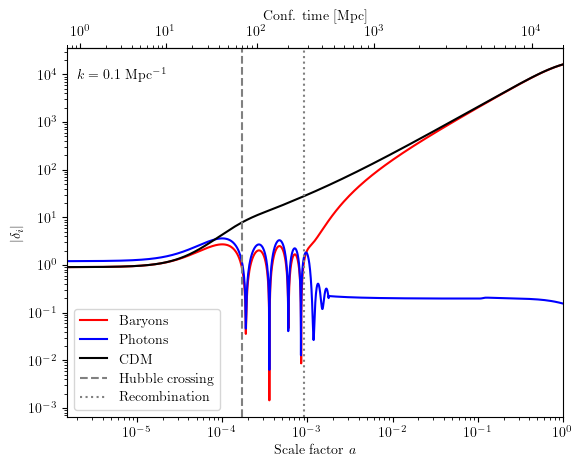

In [25]:
a_01 = pt_01['a']
tau_01 = pt_01['tau [Mpc]']

delta_b_01 = pt_01['delta_b']
delta_g_01 = pt_01['delta_g']
delta_cdm_01 = pt_01['delta_cdm']

fig, ax1 = plt.subplots()

ax1.loglog(a_01,abs(delta_b_01),'r',label='Baryons')
ax1.loglog(a_01,abs(delta_g_01),'b',label='Photons')
ax1.loglog(a_01,abs(delta_cdm_01),'k',label='CDM')

Hubble_crossing_01 = a_of_hubble_scale(0.1)

ax1.axvline(Hubble_crossing_01,linestyle='--',color='0.5',label='Hubble crossing')
ax1.axvline(a_rec,linestyle=':',color='0.5',label='Recombination')

ax1.legend()
ax1.text(2e-6,8e3,'$k=0.1$ Mpc$^{-1}$')

ax1.set_xlim([a_01[0],a_01[-1]])




ax2 = ax1.secondary_xaxis(location='top',functions=(lambda x: np.interp(x,a_01,tau_01),lambda x: np.interp(x,tau_01,a_01)))

ax2.set_xticks([1,10,100,1000,1e4])
ax2.set_xlabel('Conf. time [Mpc]')


# ax1.axvline(a_of_hubble_scale(1),linestyle='--')
# ax1.axvline(np.interp(10,tau_01,a_01))

ax1.set_xlabel('Scale factor $a$')
ax1.set_ylabel('$\\left|\\delta_{i}\\right|$')

It is clear that the dark matter perturbations start growing early, while the baryons stay coupled to the photons and the coupled fluid oscillates. At recombination the baryons are allowed to cluster, while the photons begin to free-stream.


Let's now see how the length scale of the perturbations affect them.

Text(0, 0.5, '$\\left|\\delta_\\mathrm{cdm}\\right|$')

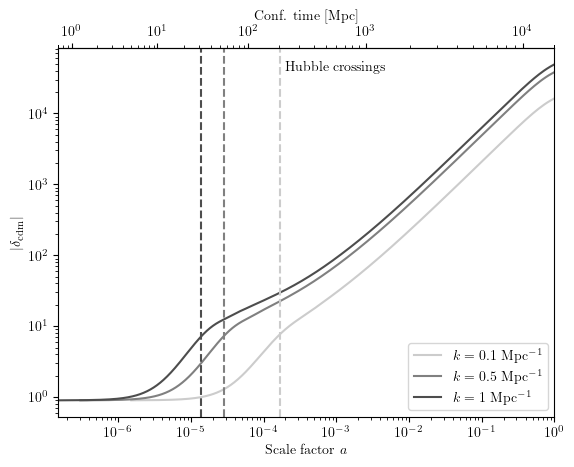

In [43]:
a_05 = pt_05['a']
tau_05 = pt_05['tau [Mpc]']

# delta_b_05 = pt_05['delta_b']
# delta_g_05 = pt_05['delta_g']
delta_cdm_05 = pt_05['delta_cdm']

a_1 = pt_1['a']
tau_1 = pt_1['tau [Mpc]']

# delta_b_1 = pt_1['delta_b']
# delta_g_1 = pt_1['delta_g']
delta_cdm_1 = pt_1['delta_cdm']

fig, ax1 = plt.subplots()

ax1.loglog(a_01,abs(delta_cdm_01),'0.8',label='$k=0.1$ Mpc$^{-1}$')
ax1.loglog(a_05,abs(delta_cdm_05),'0.5',label='$k=0.5$ Mpc$^{-1}$')
ax1.loglog(a_1,abs(delta_cdm_1),'0.3',label='$k=1$ Mpc$^{-1}$')

Hubble_crossing_05 = a_of_hubble_scale(0.5)
Hubble_crossing_1 = a_of_hubble_scale(1)

ax1.axvline(Hubble_crossing_01,linestyle='--',color='0.8')
ax1.axvline(Hubble_crossing_05,linestyle='--',color='0.5')
ax1.axvline(Hubble_crossing_1,linestyle='--',color='0.3')

ax1.text(2e-4,4e4,'Hubble crossings')

ax2 = ax1.secondary_xaxis(location='top',functions=(lambda x: np.interp(x,a_1,tau_1),lambda x: np.interp(x,tau_01,a_01)))

ax2.set_xticks([1,10,100,1000,1e4])
ax2.set_xlabel('Conf. time [Mpc]')

ax1.set_xlim([a_1[0],a_1[-1]])

ax1.legend()
# ax1.axvline(a_of_hubble_scale(1),linestyle='--')
# ax1.axvline(np.interp(10,tau_01,a_01))

ax1.set_xlabel('Scale factor $a$')
ax1.set_ylabel('$\\left|\\delta_\\mathrm{cdm}\\right|$')


It is clear that the smaller scale (larger $k$) dark matter perturbations which enter the horizon earlier have more time to grow, and thus end up at larger values.

Let's now return to our interacting dark matter cosmology, but use a slightly larger cross-section.

In [61]:
cosmo_int = Class()
cosmo_int.set({'f_idm':0.9, 
               'm_idm':1e6, 
               'cross_idm_b':1e-38, 
               'n_index_idm_b': -4,
               'k_output_values':0.1,
               'output':'mPk'
               })
pt_int = cosmo_int.get_perturbations()['scalar'][0]

Now let's plot the interacting dark matter along with the standard $\Lambda$ CDM dark matter.

In [62]:
a_int = pt_int['a']
tau_int = pt_int['tau [Mpc]']

delta_b_int = pt_int['delta_b']
delta_g_int = pt_int['delta_g']
delta_idm_int = pt_int['delta_idm']

Text(0, 0.5, '$\\left|\\delta_{i}\\right|$')

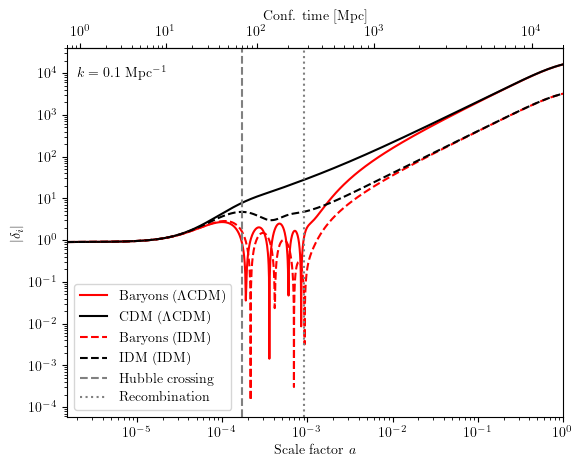

In [63]:
fig, ax1 = plt.subplots()

ax1.loglog(a_01,abs(delta_b_01),'r',label='Baryons ($\\Lambda$CDM)')
# ax1.loglog(a_01,abs(delta_g_01),'b',label='Photons')
ax1.loglog(a_01,abs(delta_cdm_01),'k',label='CDM ($\\Lambda$CDM)')

ax1.loglog(a_int,abs(delta_b_int),'r--',label='Baryons (IDM)')
# ax1.loglog(a_01,abs(delta_g_01),'b',label='Photons')
ax1.loglog(a_int,abs(delta_idm_int),'k--',label='IDM (IDM)')

Hubble_crossing_01 = a_of_hubble_scale(0.1)

ax1.axvline(Hubble_crossing_01,linestyle='--',color='0.5',label='Hubble crossing')
ax1.axvline(a_rec,linestyle=':',color='0.5',label='Recombination')

ax1.legend()
ax1.text(2e-6,8e3,'$k=0.1$ Mpc$^{-1}$')

ax1.set_xlim([a_01[0],a_01[-1]])




ax2 = ax1.secondary_xaxis(location='top',functions=(lambda x: np.interp(x,a_01,tau_01),lambda x: np.interp(x,tau_01,a_01)))

ax2.set_xticks([1,10,100,1000,1e4])
ax2.set_xlabel('Conf. time [Mpc]')


# ax1.axvline(a_of_hubble_scale(1),linestyle='--')
# ax1.axvline(np.interp(10,tau_01,a_01))

ax1.set_xlabel('Scale factor $a$')
ax1.set_ylabel('$\\left|\\delta_{i}\\right|$')

Let's look at the $\theta$ (velocity divercence) as well, as the scattering couples the species through the Euler equation.

In [64]:
theta_b_01 = pt_01['theta_b']
theta_g_01 = pt_01['theta_g']
theta_cdm_01 = pt_01['theta_cdm']

theta_b_int = pt_int['theta_b']
theta_g_int = pt_int['theta_g']
theta_idm_int = pt_int['theta_cdm']

Text(0, 0.5, '$\\left|\\theta_{i}\\right|$')

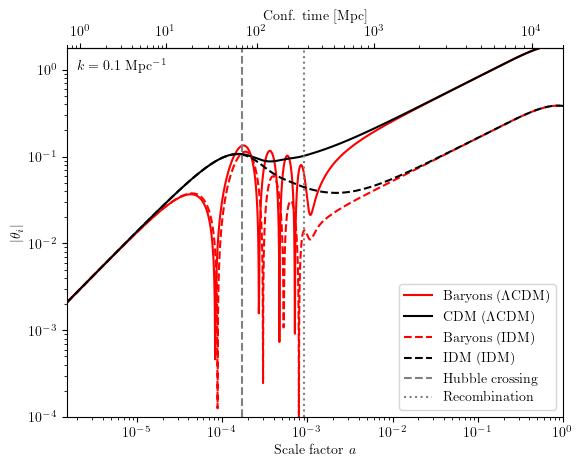

In [73]:
fig, ax1 = plt.subplots()

# ax1.loglog(a_01,abs(theta_g_01),'b',label='Photons ($\\Lambda$CDM)')
ax1.loglog(a_01,abs(theta_b_01),'r',label='Baryons ($\\Lambda$CDM)')
ax1.loglog(a_01,abs(theta_cdm_01),'k',label='CDM ($\\Lambda$CDM)')

# ax1.loglog(a_int,abs(theta_g_int),'b--',label='Photons (IDM)')
ax1.loglog(a_int,abs(theta_b_int),'r--',label='Baryons (IDM)')
ax1.loglog(a_int,abs(theta_idm_int),'k--',label='IDM (IDM)')

Hubble_crossing_01 = a_of_hubble_scale(0.1)

ax1.axvline(Hubble_crossing_01,linestyle='--',color='0.5',label='Hubble crossing')
ax1.axvline(a_rec,linestyle=':',color='0.5',label='Recombination')

ax1.legend()
ax1.text(2e-6,1,'$k=0.1$ Mpc$^{-1}$')

ax1.set_xlim([a_01[0],a_01[-1]])

ax1.set_ylim([1e-4,1.8])


ax2 = ax1.secondary_xaxis(location='top',functions=(lambda x: np.interp(x,a_01,tau_01),lambda x: np.interp(x,tau_01,a_01)))

ax2.set_xticks([1,10,100,1000,1e4])
ax2.set_xlabel('Conf. time [Mpc]')


# ax1.axvline(a_of_hubble_scale(1),linestyle='--')
# ax1.axvline(np.interp(10,tau_01,a_01))

ax1.set_xlabel('Scale factor $a$')
ax1.set_ylabel('$\\left|\\theta_{i}\\right|$')

It is clear here that the presence of interactions couples the dark matter to the baryons while the baryon-photon fluid is still oscillating, which suppresses the growth of structure in the dark sector.